<center> 
<h1> <u>EN2550-Assignment 1 </u></h1>
<h1> <u>Intensity Transformations and Neighborhood Filtering </u></h1> 
</center>


***

* Name: B.S.V.W. Munasinghe <br> 
* Index Number: 190397E 

***

* Importing Libraries,

In [1]:
#Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import sympy as sy

#To display the figures in the converted PDF/HTML files
%matplotlib inline

***

## Question 1

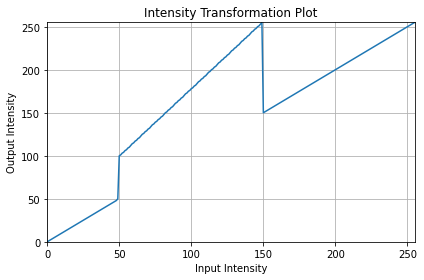

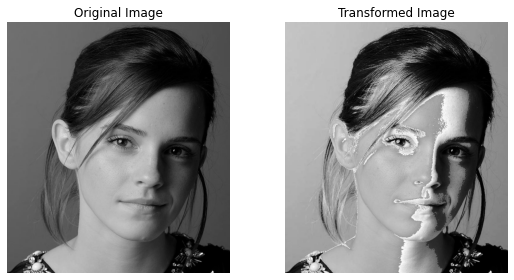

In [85]:
#Creating the transformation array
T1 = np.linspace(0,50,50)
T2 = np.linspace(100,255,100)
T3 = np.linspace(150,255,106)

#Concatenate sub arrays to get the transformation
t = np.concatenate((T1,T2,T3),axis = 0).astype(np.uint8)

#Plot the transformation
fig,ax = plt.subplots()
ax.plot(t)
ax.grid()
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_title("Intensity Transformation Plot")

#Read the image using opencv
img = cv.imread('images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)

assert img is not None

#apply the transformation using lookup table
transformed_img = cv.LUT(img,t)

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots(1,2,figsize=(8,4))
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[0].imshow(img_)

transformed_img_ = cv.cvtColor(transformed_img,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title("Transformed Image")
ax[1].imshow(transformed_img_)

***

## Question 2

### (a) White Matter

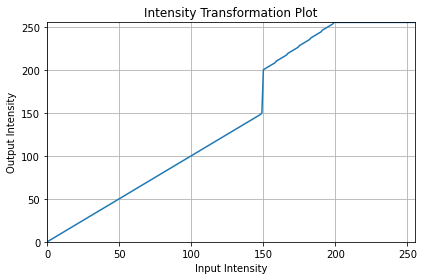

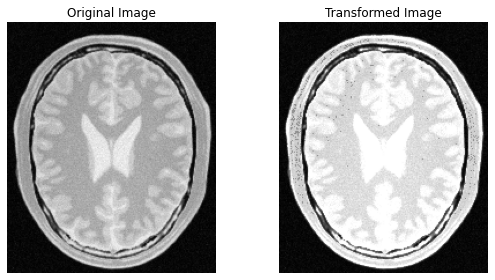

In [65]:
#Creating the transformation array
T1 = np.linspace(0,150,150)
T2 = np.linspace(200,255,50)
T3 = np.linspace(255,255,56)

#Concatenate sub arrays to get the transformation
t = np.concatenate((T1,T2,T3),axis = 0).astype(np.uint8)

#Plot the transformation
fig,ax = plt.subplots()
ax.plot(t)
ax.grid()
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_title("Intensity Transformation Plot")

#Read the image using opencv
img = cv.imread('images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None

#apply the transformation using lookup table
transformed_img = cv.LUT(img,t)

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots(1,2,figsize=(8,4))
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[0].imshow(img_)

transformed_img_ = cv.cvtColor(transformed_img,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title("Transformed Image")
ax[1].imshow(transformed_img_)

### (b) Gray Matter

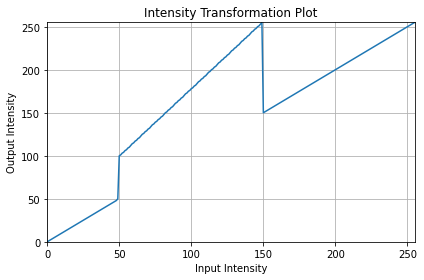

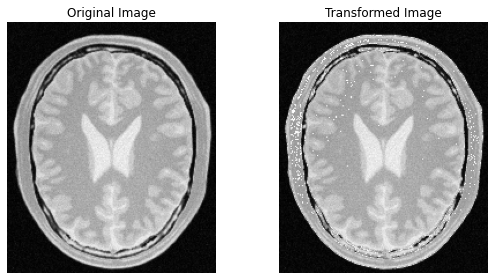

In [66]:
#Creating the transformation array
T1 = np.linspace(0,50,50)
T2 = np.linspace(100,255,100)
T3 = np.linspace(150,255,106)

#Concatenate sub arrays to get the transformation
t = np.concatenate((T1,T2,T3),axis = 0).astype(np.uint8)

#Plot the transformation
fig,ax = plt.subplots()
ax.plot(t)
ax.grid()
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_title("Intensity Transformation Plot")

#Read the image using opencv
img = cv.imread('images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None

#apply the transformation using lookup table
transformed_img = cv.LUT(img,t)

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots(1,2,figsize=(8,4))
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[0].imshow(img_)

transformed_img_ = cv.cvtColor(transformed_img,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title("Transformed Image")
ax[1].imshow(transformed_img_)

## Question 3

### (a)

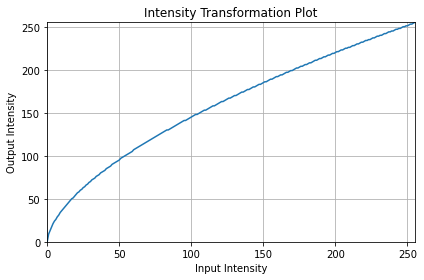

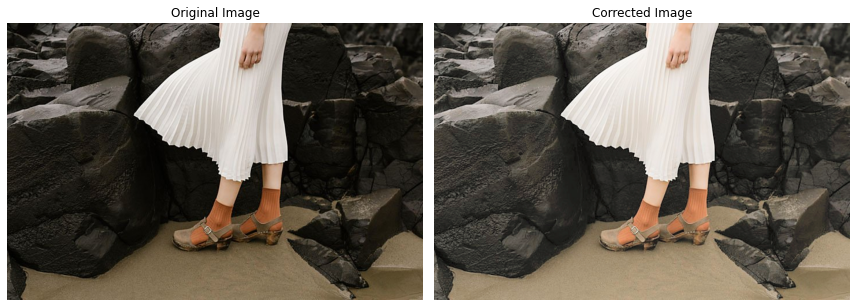

In [6]:
gemma = 0.6
t = np.array([(i/255)**gemma*255 for i in range(0,256)]).astype(np.uint8)

#Plot the transformation
fig,ax = plt.subplots()
ax.plot(t)
ax.grid()
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_title("Intensity Transformation Plot")

#Read the image using opencv
img = cv.imread('images/highlights_and_shadows.jpg',cv.IMREAD_COLOR)

assert img is not None

#Changing the color plane to L*a*b*
img_Lab = cv.cvtColor(img,cv.COLOR_BGR2Lab)
img_L = img_Lab[:,:,0]
img_a = img_Lab[:,:,1]
img_b = img_Lab[:,:,2]

#apply the transformation using lookup table
transformed_L = cv.LUT(img_L,t)

#Get the BGR color plane image back by merging sub layers and convert back to BGR
transformed_img = cv.cvtColor(cv.merge([transformed_L,img_a,img_b]),cv.COLOR_Lab2BGR)

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots(1,2,figsize=(12,6))
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[0].imshow(img_)

transformed_img_ = cv.cvtColor(transformed_img,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title("Corrected Image")
ax[1].imshow(transformed_img_)

### (b)

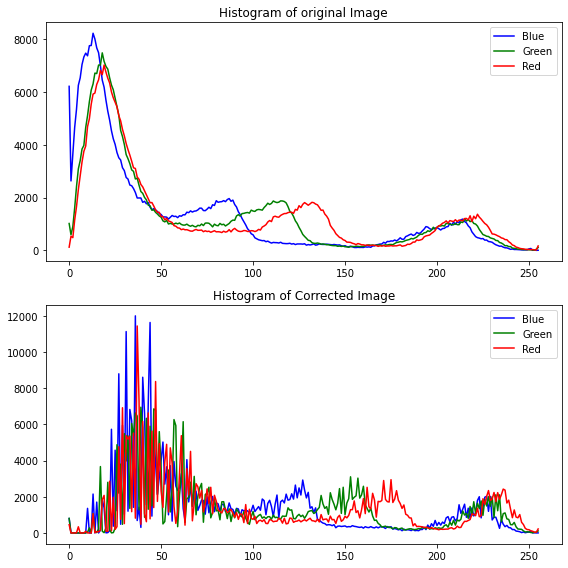

In [11]:
hist_img = cv.calcHist([img],[0],None,[256],[0,256])
hist_gemma_img = cv.calcHist([transformed_img],[0],None,[256],[0,256])

fig,ax = plt.subplots(2,1,figsize=(8,8))
colors = ['b','g','r']
labels = ['Blue','Green','Red']
for i in range (3):
    hist_img = cv.calcHist([img],[i],None,[256],[0,256])
    hist_gemma_img = cv.calcHist([transformed_img],[i],None,[256],[0,256])
    ax[0].plot(hist_img,color=colors[i],label = labels[i])
    ax[0].set_title("Histogram of original Image")
    ax[0].legend()
    ax[1].plot(hist_gemma_img,color=colors[i],label = labels[i])
    ax[1].set_title("Histogram of Corrected Image")
    ax[1].legend()

## Question 4

Transformation generating equation for the Equalizing part:<br>$s_k=\frac{L-1}{MN}\displaystyle\sum_{j=0}^k n_{j}$  <br>  here,<br>$k = 0,1,...,L-1$

In [3]:
def equalizeImage(img,hist):
    
    transf = np.zeros(256)  #Array to store new transformation for equalizer
    MN = img.size   #Image resolution (Number of pixels)
    L = 256         #Number of intensity levels 
    
    #Calculating the transformation according to the equation given above (s_k array)
    for i in range(len(transf)):
        transf[i] = int((L-1)*(sum([hist[j] for j in range(0,i+1)]))/MN)
    
    transf = np.array(transf).astype(np.uint8)  #Change the data type to uint8
    eqalized_img = cv.LUT(img,transf)   #Do the equalizing transformation using lookup table
    
    #Take histograme of the equalized image
    hist = cv.calcHist([eqalized_img],[0],None,[256],[0,256])

    #returning results
    return eqalized_img, hist

{
    "tags": [
        "hide-input",
    ]
}

{'tags': ['hide-input']}

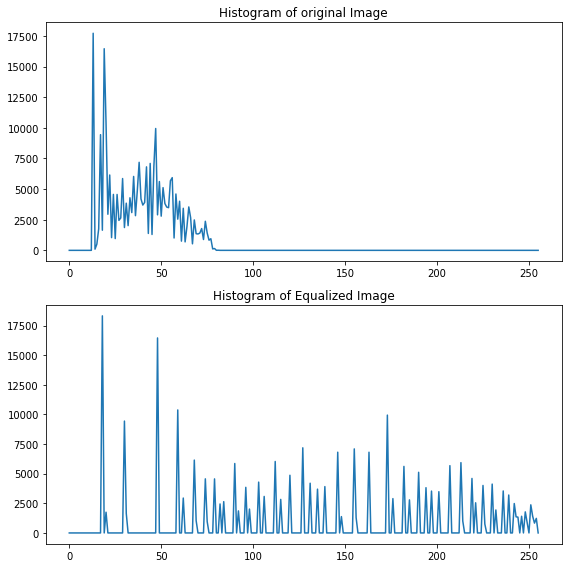

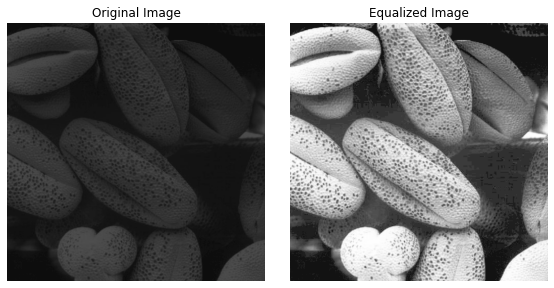

In [5]:
#Read the image using opencv
img = cv.imread('images/shells.png',cv.IMREAD_GRAYSCALE)

assert img is not None

hist_img = cv.calcHist([img],[0],None,[256],[0,256])
new_img,new_hist = equalizeImage(img,hist_img)

fig,ax = plt.subplots(2,1,figsize=(8,8))
ax[0].plot(hist_img)
ax[0].set_title("Histogram of original Image")
ax[1].plot(new_hist)
ax[1].set_title("Histogram of Equalized Image")

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots(1,2,figsize=(8,4))
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[0].imshow(img_)

new_img_ = cv.cvtColor(new_img,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title("Equalized Image")
ax[1].imshow(new_img_)

## Question 5

In [2]:
def zoomImage(img,scale,mode):
    # Scale- amount of zoom
    # mode- nearest-neighbor (mode=0) or bilinear interpolation (mode=1)
    r,c = img.shape[0]*scale,img.shape[1]*scale
    zoomed_img = np.zeros((r,c))
    for i in range(r):
        for j in range(c):
            if mode == 0:
                r_,c_ = roundNeighbour(i,j,img.shape[0],img.shape[1],scale)
                zoomed_img[i][j] = img[r_][c_]           
            elif mode == 1:
                zoomed_img[i][j] = linearInterpolate(i,j,scale,img)
    return zoomed_img.astype(np.uint8)
                

In [3]:
def roundNeighbour(i,j,r,c,s):
    i_ = i//s if (i/s - i//s)<0.5 else (i//s + 1)
    j_ = j//s if (j/s - j//s)<0.5 else (j//s + 1)

    if i_>=r: 
        i_ = r-1
    if j_>=c: 
        j_ = c-1
    return i_,j_

In [14]:
def linearInterpolate(i,j,s,img):
    i_ = i/s
    j_ = j/s
    _i = i//s
    _j = j//s
    p = i_-_i
    q = j_-_j
    
    if _i>=img.shape[0] or _i+1>=img.shape[0]: 
        _i = img.shape[0]-1
    if _j>=img.shape[1] or _j+1>=img.shape[1]: 
        _j = img.shape[1]-1
    
    if  _i+1>=img.shape[0]: 
        _i = img.shape[0]-2
    if _j+1>=img.shape[1]: 
        _j = img.shape[1]-2
        
    point1 = img[_i][_j]
    point2 = img[_i][_j+1]
    point3 = img[_i+1][_j]
    point4 = img[_i+1][_j+1]
    
    val1 = p*point3 + (1-p)*point1
    val2 = p*point4 + (1-p)*point2 
    
    return val2*q + val1*(1-q)

In [21]:
def calSSD(im1,im2):
    im1 = np.array(im1)
    im2 = np.array(im2)
    SSD = np.sum(np.square(np.subtract(im1,im2)))
    return SSD/im1.size

SSD =  44.205000482253084


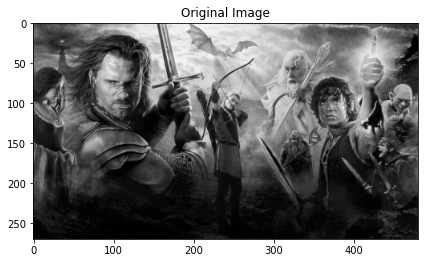

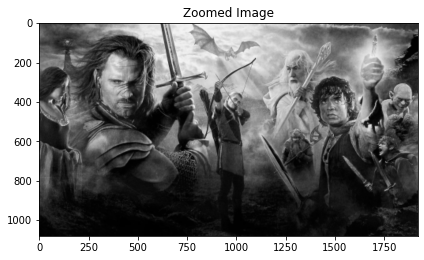

In [25]:
#Read the image using opencv
img = cv.imread('images/a1q5images/im01small.png',cv.IMREAD_GRAYSCALE)
assert img is not None

new_img = zoomImage(img,4,0)
given_img = cv.imread('images/a1q5images/im01.png',cv.IMREAD_GRAYSCALE)
print("SSD = ",calSSD(given_img,new_img))

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img)
cv.waitKey(0)
cv.imshow('Image',new_img)
cv.waitKey(0)
cv.destroyAllWindows()
#display images using matplotlib

fig,ax = plt.subplots()
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax.set_title("Original Image")
ax.imshow(img_)

fig,ax = plt.subplots()
new_img_ = cv.cvtColor(new_img,cv.COLOR_BGR2RGB)
ax.set_title("Zoomed Image")
ax.imshow(new_img_)
